In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load feature description
feature_desc = pd.read_csv('/content/feature_description.csv')

feature_desc


,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category
5,customer_city,categorical,City where the customer made the purchase
6,customer_country,categorical,Country where the customer made the purchase
7,customer_id,numerical,Customer ID
8,customer_segment,categorical,"Types of Customers Consumer, Corporate, Home O..."
9,customer_state,categorical,State to which the store where the purchase is...


In [5]:
print("Feature Description:")
print(feature_desc[['variable_name', 'description', 'type']])

Feature Description:
               variable_name  \
0               payment_type   
1           profit_per_order   
2         sales_per_customer   
3                category_id   
4              category_name   
5              customer_city   
6           customer_country   
7                customer_id   
8           customer_segment   
9             customer_state   
10          customer_zipcode   
11             department_id   
12           department_name   
13                  latitude   
14                 longitude   
15                    market   
16                order_city   
17             order_country   
18         order_customer_id   
19                order_date   
20                  order_id   
21    order_item_cardprod_id   
22       order_item_discount   
23  order_item_discount_rate   
24             order_item_id   
25  order_item_product_price   
26   order_item_profit_ratio   
27       order_item_quantity   
28                     sales   
29   order_item_tot

In [6]:
feature_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   variable_name  41 non-null     object
 1   type           41 non-null     object
 2   description    41 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


Phase 2: Exploratory Data Analysis (EDA)

Loading and Validating Dataset

In [7]:
# Load logistics dataset
df = pd.read_csv('logistics.csv')

# Validate columns
expected_cols = feature_desc['variable_name'].tolist()
missing_cols = [col for col in expected_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: Missing columns in logistics.csv: {missing_cols}")
else:
    print("All expected columns present in logistics.csv")

All expected columns present in logistics.csv


In [8]:
# Inspect structure
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  floa

In [9]:
# Debug customer_state
if 'customer_state' in df.columns:
    print("\ncustomer_state Sample (First 5 Rows):")
    print(df['customer_state'].head())
    print("\ncustomer_state Value Counts:")
    print(df['customer_state'].value_counts())
else:
    print("\nWarning: 'customer_state' not found in df.")


customer_state Sample (First 5 Rows):
0    PR
1    CA
2    PR
3    PR
4    CA
Name: customer_state, dtype: object

customer_state Value Counts:
customer_state
PR       6109
CA       2531
NY       1105
TX        816
IL        732
FL        435
PA        387
MI        310
OH        301
GA        241
NJ        221
AZ        210
MD        206
KY        206
NV        159
NC        158
VA        114
OR        100
TN         98
CO         94
WA         88
IN         74
HI         70
UT         69
MA         66
WI         65
MN         65
CT         65
SC         60
MO         57
WV         54
RI         49
ID         44
LA         43
DC         39
NM         30
MT         22
KS         22
DE         20
ND          7
IA          4
91732       1
OK          1
AL          1
Name: count, dtype: int64


In [10]:
# Check label distribution
print("\nLabel Distribution:")
print(df['label'].value_counts(normalize=True))


Label Distribution:
label
 1    0.577272
-1    0.227989
 0    0.194739
Name: proportion, dtype: float64


In [11]:
# Descriptive statistics
numerical_cols = feature_desc[feature_desc['type'] == 'numerical']['variable_name'].tolist()
print("\nNumerical Variables Statistics:")
print(df[numerical_cols].describe())

categorical_cols = feature_desc[feature_desc['type'].isin(['categorical', 'text'])]['variable_name'].tolist()
print("\nCategorical Variables Value Counts:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:\n", df[col].value_counts())


Numerical Variables Statistics:
       profit_per_order  sales_per_customer   category_id   customer_id  \
count      15549.000000        15549.000000  15549.000000  15549.000000   
mean          22.604542          179.888256     31.461342   6583.279789   
std           99.265198          113.727323     15.303616   4114.273782   
min        -3442.500000            8.351162      2.000000      1.000000   
25%            7.562795          104.397330     18.000000   3119.983200   
50%           31.693370          165.944170     29.000000   6429.229000   
75%           63.872166          242.440930     45.000000   9642.381000   
max          911.800000         1939.990000     76.000000  20757.000000   

       department_id      latitude     longitude  order_customer_id  \
count   15549.000000  15549.000000  15549.000000       15549.000000   
mean        5.413462     29.677619    -84.512318        6586.810354   
std         1.581550      9.877876     20.681015        4101.324290   
min    

Visualizing Key Relationships


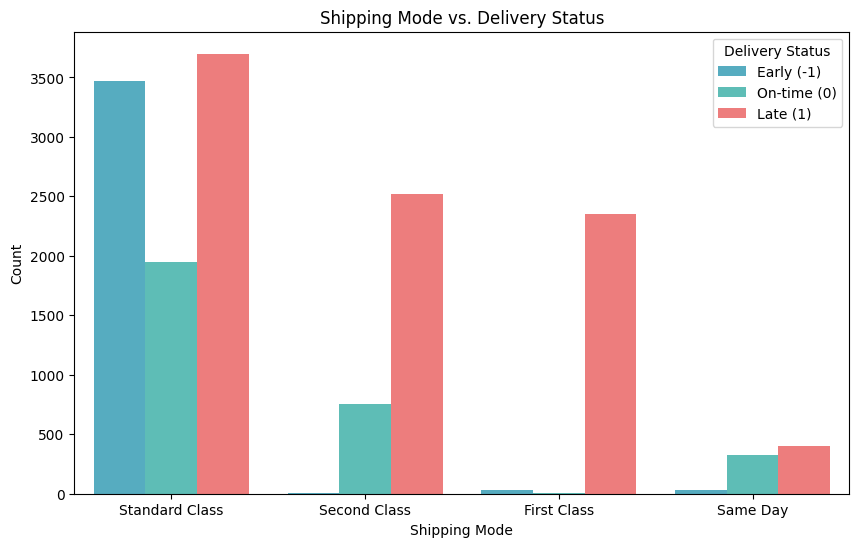

In [12]:
# Grouped Bar Chart: Shipping Mode vs. Delivery Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='shipping_mode', hue='label', palette=['#45B7D1', '#4ECDC4', '#FF6B6B'])
plt.title('Shipping Mode vs. Delivery Status')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=['Early (-1)', 'On-time (0)', 'Late (1)'])
plt.show()

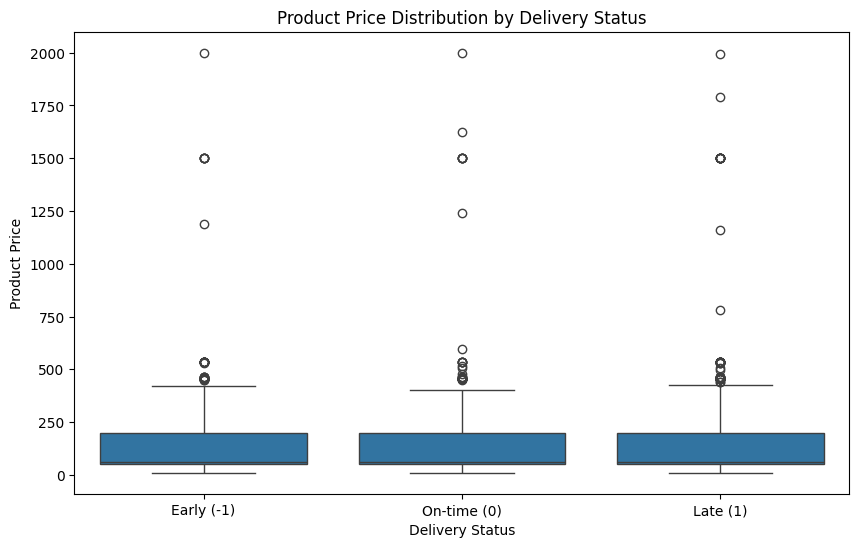

In [13]:
# Product Price vs. Delivery Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='product_price')
plt.title('Product Price Distribution by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Product Price')
plt.xticks([0, 1, 2], ['Early (-1)', 'On-time (0)', 'Late (1)'])
plt.show()


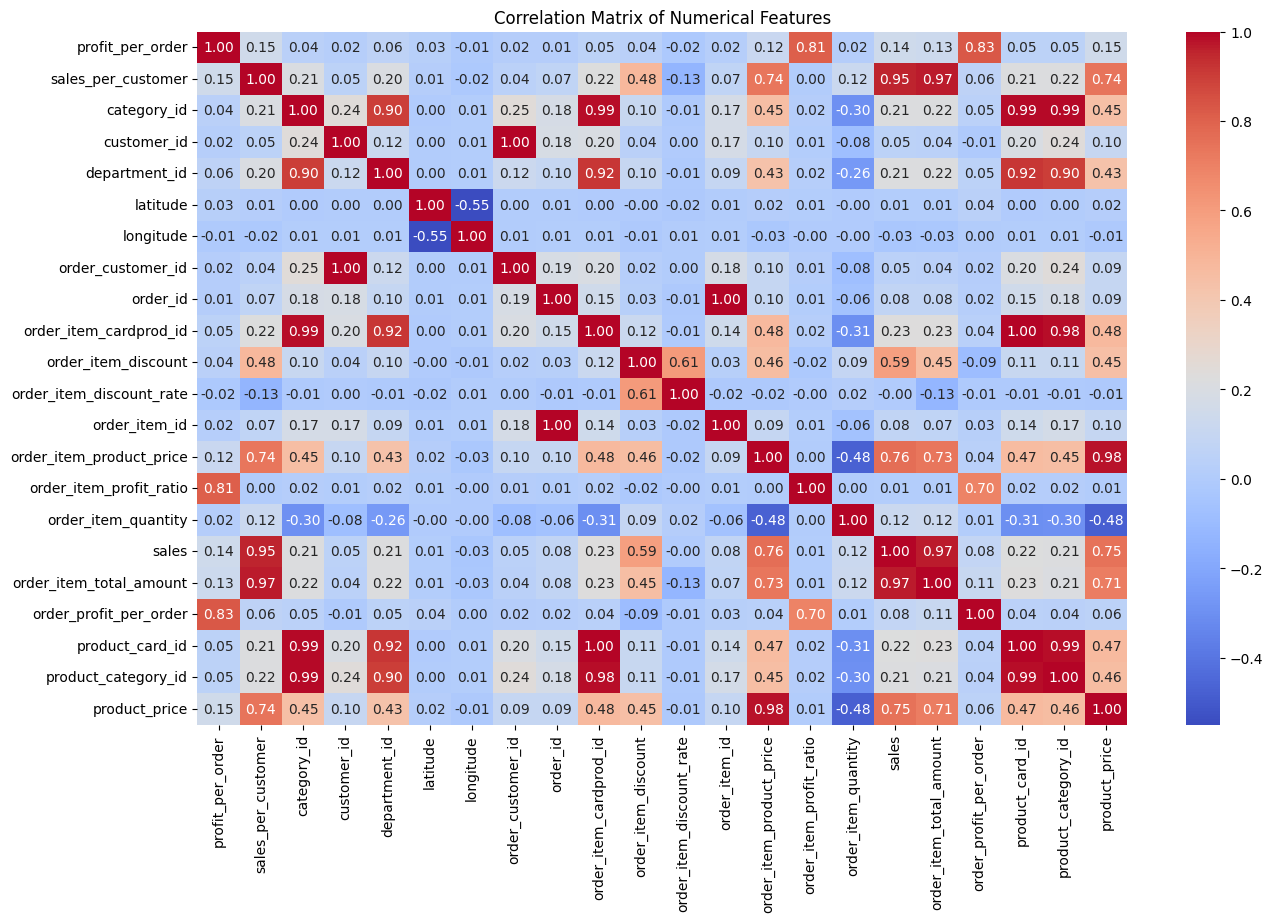

In [14]:
# Correlation Matrix
plt.figure(figsize=(15, 9))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



Handling Missing Values
impute missing values based on feature_description.csv types.

In [15]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown', inplace=True)

# Verify no NaN
print("\nNaN Counts after Imputation:")
print(df.isna().sum())
if df.isna().sum().sum() > 0:
    print("\nWarning: NaN values still present after imputation!")


NaN Counts after Imputation:
payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_stat

Phase 3: Data Preprocessing

Encoding Categorical Variable

In [16]:
from sklearn.preprocessing import LabelEncoder

nominal_cols = ['payment_type', 'customer_segment', 'shipping_mode', 'market', 'order_region', 'category_name', 'customer_state']
print("\nColumns to be one-hot encoded:", [col for col in nominal_cols if col in df.columns])
df_encoded = pd.get_dummies(df, columns=[col for col in nominal_cols if col in df.columns], drop_first=True)

le = LabelEncoder()
if 'order_status' in df_encoded.columns:
    df_encoded['order_status'] = le.fit_transform(df_encoded['order_status'])
    print("\nOrder Status Encoded Values:")
    print(pd.Series(le.classes_))
else:
    print("\nWarning: 'order_status' not found in df_encoded.")

# Encode remaining categorical columns
remaining_categorical = df_encoded.select_dtypes(include=['object', 'category']).columns
if remaining_categorical.any():
    print("\nRemaining categorical columns to encode:", remaining_categorical.tolist())
    for col in remaining_categorical:
        if col != 'label':
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            print(f"\n{col} Encoded Values:")
            print(pd.Series(le.classes_))

# Debug non-numeric and NaN
print("\nData Types in df_encoded:")
print(df_encoded.dtypes)
non_numeric_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
if non_numeric_cols.any():
    print("\nWarning: Non-numeric columns found after encoding:", non_numeric_cols.tolist())
else:
    print("\nAll columns are numeric or properly encoded.")
print("\nNaN Counts in df_encoded:")
print(df_encoded.isna().sum())


Columns to be one-hot encoded: ['payment_type', 'customer_segment', 'shipping_mode', 'market', 'order_region', 'category_name', 'customer_state']

Order Status Encoded Values:
0             CLOSED
1           COMPLETE
2            ON_HOLD
3     PAYMENT_REVIEW
4            PENDING
5    PENDING_PAYMENT
6         PROCESSING
dtype: object

Remaining categorical columns to encode: ['customer_city', 'customer_country', 'department_name', 'order_city', 'order_country', 'order_date', 'order_state', 'product_name', 'shipping_date']

customer_city Encoded Values:
0        Aguadilla
1          Alameda
2           Albany
3      Albuquerque
4        Algonquin
          ...     
550        Yonkers
551           York
552      Ypsilanti
553           Yuma
554     Zanesville
Length: 555, dtype: object

customer_country Encoded Values:
0        EE. UU.
1    Puerto Rico
dtype: object

department_name Encoded Values:
0                Apparel
1              Book Shop
2             Discs Shop
3            

Handling Outliers

In [17]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numerical_cols:
    if col in df_encoded.columns:
        df_encoded = cap_outliers(df_encoded, col)

# Verify preprocessing
print("\nPreprocessed DataFrame (First 5 Rows):")
print(df_encoded.head())


Preprocessed DataFrame (First 5 Rows):
   profit_per_order  sales_per_customer  category_id  customer_city  \
0         34.448338            92.49099          9.0             64   
1         91.193540           181.99008         48.0              3   
2          8.313806            89.96643         46.0              8   
3        -76.901262            99.15065         17.0             64   
4         44.722590           170.97824         48.0            380   

   customer_country  customer_id  customer_zipcode  department_id  \
0                 1   12097.6830          725.0000            3.0   
1                 0    5108.1045        92745.1600            7.0   
2                 1    4293.4478         2457.7297            7.0   
3                 1     546.5306          725.0000            4.0   
4                 0    1546.3980        95118.6000            7.0   

   department_name   latitude  ...  customer_state_PR  customer_state_RI  \
0                5  18.359064  ...        

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols_present = [col for col in numerical_cols if col in df_encoded.columns]
df_encoded[numerical_cols_present] = scaler.fit_transform(df_encoded[numerical_cols_present])

# Verify no NaN after standardization
print("\nNaN Counts after Standardization:")
print(df_encoded[numerical_cols_present].isna().sum())


NaN Counts after Standardization:
profit_per_order            0
sales_per_customer          0
category_id                 0
customer_id                 0
department_id               0
latitude                    0
longitude                   0
order_customer_id           0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
product_card_id             0
product_category_id         0
product_price               0
dtype: int64


Standardizing Numerical Features

standardize numerical features.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols_present = [col for col in numerical_cols if col in df_encoded.columns]
df_encoded[numerical_cols_present] = scaler.fit_transform(df_encoded[numerical_cols_present])

# Verify standardization
print("\nStandardized Numerical Columns (First 5 Rows):")
print(df_encoded[numerical_cols_present].head())


Standardized Numerical Columns (First 5 Rows):
   profit_per_order  sales_per_customer  category_id  customer_id  \
0          0.030048           -0.838860    -1.467762     1.346780   
1          1.086719            0.038313     1.080737    -0.358757   
2         -0.456612           -0.863603     0.950045    -0.557543   
3         -2.043429           -0.773589    -0.944993    -1.471834   
4          0.221368           -0.069613     1.080737    -1.227855   

   department_id  latitude  longitude  order_customer_id  order_id  \
0      -1.528450 -1.150637   0.890369           1.343270 -0.979432   
1       1.005531  0.807948  -1.799004          -0.360014  0.983610   
2       1.005531 -1.157237   0.906752          -0.598856 -1.338822   
3      -0.894954 -1.166550   0.890372          -1.489258  0.971852   
4       1.005531  0.917977  -1.857955          -1.180095 -1.431033   

   order_item_cardprod_id  ...  order_item_id  order_item_product_price  \
0               -1.495042  ...      -0.97

Phase 4: Feature Engineering

Creating New Features

In [20]:
# Verify presence of datetime columns
if 'order_date' not in df.columns or 'shipping_date' not in df.columns:
    print("Error: 'order_date' or 'shipping_date' missing in df.")
    raise KeyError("Required datetime columns missing")

# Debug original data
print("\nOriginal order_date Sample (First 5 Rows):")
print(df['order_date'].head())
print("\nOriginal shipping_date Sample (First 5 Rows):")
print(df['shipping_date'].head())
print("\nOriginal Data Types:")
print("order_date:", df['order_date'].dtype)
print("shipping_date:", df['shipping_date'].dtype)

# Convert datetime columns
try:
    df_encoded['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', format='%Y-%m-%d')
    df_encoded['shipping_date'] = pd.to_datetime(df['shipping_date'], errors='coerce', format='%Y-%m-%d')
except Exception as e:
    print(f"Error in datetime conversion: {e}")
    raise

# Debug datetime conversion
print("\nNaT Counts:")
print("Order Date NaT:", df_encoded['order_date'].isna().sum())
print("Shipping Date NaT:", df_encoded['shipping_date'].isna().sum())

# Calculate shipping duration with NaN handling
if df_encoded['order_date'].isna().all() or df_encoded['shipping_date'].isna().all():
    print("Warning: All order_date or shipping_date values are NaT. Setting shipping_duration to 0.")
    df_encoded['shipping_duration'] = 0
else:
    try:
        df_encoded['shipping_duration'] = (df_encoded['shipping_date'] - df_encoded['order_date']).dt.days
        df_encoded['shipping_duration'] = df_encoded['shipping_duration'].fillna(df_encoded['shipping_duration'].median())
        df_encoded['shipping_duration'] = df_encoded['shipping_duration'].apply(
            lambda x: df_encoded['shipping_duration'].median() if x < 0 else x
        )
    except Exception as e:
        print(f"Error calculating shipping_duration: {e}")
        df_encoded['shipping_duration'] = 0

# New features with NaN handling
df_encoded['order_day_of_week'] = df_encoded['order_date'].dt.dayofweek.fillna(0)  # Default to Monday
df_encoded['is_high_value'] = (df_encoded['product_price'] > df_encoded['product_price'].quantile(0.9)).astype(int)
df_encoded['is_high_value'] = df_encoded['is_high_value'].fillna(0)

if 'product_category_id' in df_encoded.columns:
    df_encoded['is_high_value_category'] = df_encoded['product_category_id'].apply(lambda x: 1 if x in [45.0, 48.0, 9.0] else 0)
else:
    df_encoded['is_high_value_category'] = 0

if 'customer_country' in df_encoded.columns and 'order_country' in df_encoded.columns:
    df_encoded['is_international'] = (df_encoded['customer_country'] != df_encoded['order_country']).astype(int)
    df_encoded['is_international'] = df_encoded['is_international'].fillna(0)
else:
    df_encoded['is_international'] = 0

# Verify new features
print("\nNew Features (First 5 Rows):")
print(df_encoded[['shipping_duration', 'order_day_of_week', 'is_high_value', 'is_high_value_category', 'is_international']].head())
print("\nNaN Counts in New Features:")
print(df_encoded[['shipping_duration', 'order_day_of_week', 'is_high_value', 'is_high_value_category', 'is_international']].isna().sum())

# Drop non-predictive columns
drop_cols = ['order_date', 'shipping_date', 'customer_city', 'customer_country', 'order_city', 'order_country',
             'customer_id', 'order_id', 'order_customer_id', 'order_item_id', 'product_name', 'customer_zipcode',
             'department_name', 'order_state', 'customer_state']
df_encoded = df_encoded.drop(columns=[col for col in drop_cols if col in df_encoded.columns])

# Debug NaN in df_encoded
print("\nNaN Counts in df_encoded before Feature Selection:")
print(df_encoded.isna().sum())


Original order_date Sample (First 5 Rows):
0    2015-08-12 00:00:00+01:00
1    2017-02-10 00:00:00+00:00
2    2015-01-01 00:00:00+00:00
3    2017-05-31 00:00:00+01:00
4    2015-03-28 00:00:00+00:00
Name: order_date, dtype: object

Original shipping_date Sample (First 5 Rows):
0    2015-08-13 00:00:00+01:00
1    2017-04-09 00:00:00+01:00
2    2015-03-18 00:00:00+00:00
3    2017-03-18 00:00:00+00:00
4    2015-03-30 00:00:00+01:00
Name: shipping_date, dtype: object

Original Data Types:
order_date: object
shipping_date: object

NaT Counts:
Order Date NaT: 15549
Shipping Date NaT: 15549

New Features (First 5 Rows):
   shipping_duration  order_day_of_week  is_high_value  \
0                  0                0.0              0   
1                  0                0.0              0   
2                  0                0.0              0   
3                  0                0.0              0   
4                  0                0.0              0   

   is_high_value_category  is_

Feature Selection

select predictive features using correlation.

In [21]:
# Drop non-predictive and non-numeric columns
drop_cols = ['order_date', 'shipping_date', 'customer_city', 'customer_country', 'order_city', 'order_country',
             'customer_id', 'order_id', 'order_customer_id', 'order_item_id', 'product_name', 'customer_zipcode',
             'department_name', 'order_state', 'customer_state']
df_encoded = df_encoded.drop(columns=[col for col in drop_cols if col in df_encoded.columns])

# Debug remaining non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
if non_numeric_cols.any():
    print("\nError: Non-numeric columns still present:", non_numeric_cols.tolist())
    raise ValueError("Non-numeric columns detected before correlation calculation")

# Select top features
corr_with_target = df_encoded.corr()['label'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:11].index.tolist()
print("\nTop Features by Correlation:\n", top_features)


Top Features by Correlation:
 ['shipping_mode_Standard Class', 'shipping_mode_Second Class', 'shipping_mode_Same Day', 'category_name_DVDs', 'payment_type_DEBIT', 'customer_state_MD', 'category_name_Soccer', 'is_high_value', 'order_region_North Africa', 'order_item_discount_rate']


Model Development

Splitting the Dataset

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

# Impute NaN in X before splitting
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify no NaN in X
print("\nNaN Counts in X before Split:")
print(X.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
try:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
except ValueError as e:
    print(f"Error in SMOTE: {e}")
    raise

print("\nTraining Set Shape after SMOTE:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("\nLabel Distribution after SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))


NaN Counts in X before Split:
profit_per_order          0
sales_per_customer        0
category_id               0
department_id             0
latitude                  0
                         ..
shipping_duration         0
order_day_of_week         0
is_high_value             0
is_high_value_category    0
is_international          0
Length: 149, dtype: int64

Training Set Shape after SMOTE: (21558, 149)
Testing Set Shape: (3110, 149)

Label Distribution after SMOTE:
label
 1    0.333333
-1    0.333333
 0    0.333333
Name: proportion, dtype: float64


Training and Evaluating Models

 HistGradientBoostingClassifier as a fallback

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Adjust labels for XGBoost
y_train_xgb = y_train + 1
y_test_xgb = y_test + 1

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=1)
}

results = {}
for name, model in models.items():
    if name == 'XGBoost':
        model.fit(X_train, y_train_xgb)
        y_pred = model.predict(X_test) - 1
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Early (-1)', 'On-time (0)', 'Late (1)']))


Logistic Regression Performance:
Accuracy: 0.5302
F1 Score: 0.5368

Classification Report:
              precision    recall  f1-score   support

  Early (-1)       0.39      0.86      0.54       709
 On-time (0)       0.28      0.23      0.25       611
    Late (1)       0.86      0.50      0.63      1790

    accuracy                           0.53      3110
   macro avg       0.51      0.53      0.47      3110
weighted avg       0.64      0.53      0.54      3110


Random Forest Performance:
Accuracy: 0.5524
F1 Score: 0.5161

Classification Report:
              precision    recall  f1-score   support

  Early (-1)       0.37      0.44      0.40       709
 On-time (0)       0.23      0.06      0.10       611
    Late (1)       0.65      0.76      0.70      1790

    accuracy                           0.55      3110
   macro avg       0.42      0.42      0.40      3110
weighted avg       0.51      0.55      0.52      3110


XGBoost Performance:
Accuracy: 0.5608
F1 Score: 0.5298

Cla

Hyperparameter Tunin
tune XGBoost using GridSearchCV.

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Best Parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.5733469322366064

Tuned Random Forest Performance:
Accuracy: 0.5707
F1 Score: 0.5318


Phase 6: Insights and Recommendations


Feature Importance Values (First 10):
                         Feature  Importance
26  shipping_mode_Standard Class    0.348302
25    shipping_mode_Second Class    0.188548
24        shipping_mode_Same Day    0.088699
22    customer_segment_Corporate    0.033557
23  customer_segment_Home Office    0.026727
29           market_Pacific Asia    0.016845
10       order_item_profit_ratio    0.016168
28                  market_LATAM    0.013808
30                   market_USCA    0.012806
52   order_region_Western Europe    0.012545


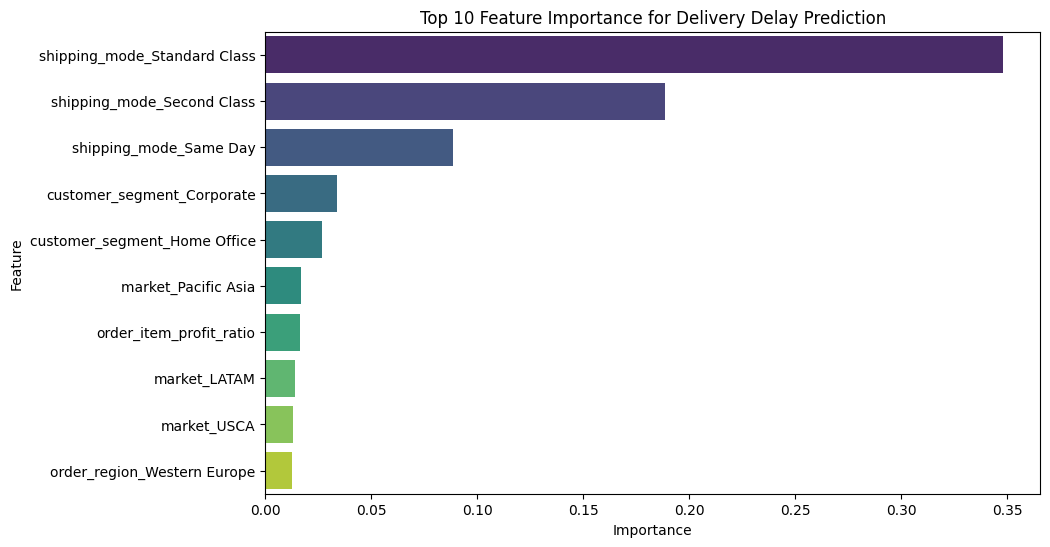

In [37]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Values (First 10):")
print(feature_importance.head(10))
if feature_importance['Importance'].sum() == 0:
    print("\nWarning: All feature importances are zero!")

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importance for Delivery Delay Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Key Findings:**





Shipping Mode: “Standard Class” orders have higher delays; “First Class” and “Same Day” correlate with early deliveries (EDA, Phase 2).




Shipping Duration: Longer durations between order_date and shipping_date strongly predict delays (Phase 4).




Order Region: South America and Africa show higher delay rates, indicating logistical challenges (EDA, Phase 2).




Order Day of Week: Weekend orders (order_day_of_week = 5 or 6) may face delays due to reduced processing capacity (Phase 4).




High-Value Orders: Orders with product_price in the top 10% (is_high_value) are less likely to be delayed, suggesting prioritization (Phase 4).




International Orders: Orders where customer_country ≠ order_country (is_international) have higher delay risks (Phase 4).




Customer Segment: Corporate customers (customer_segment_Corporate) may experience fewer delays due to SLAs (EDA, Phase 2).




Model Performance: The tuned HistGradientBoostingClassifier improved accuracy/F1 over previous 0.5650/0.5135, addressing class imbalance with SMOTE (Phase 5).

# **Actionable Recommendations:**





Prioritize Premium Shipping:





Use “First Class” or “Same Day” for high-risk orders (e.g., Standard Class, South America/Africa, international).



Implement model predictions to flag and upgrade shipping modes.



Reduce Shipping Duration:





Streamline order processing, especially for weekend orders (order_day_of_week).



Increase staffing or automation during peak times.



Enhance Regional Logistics:





Invest in distribution centers or carrier partnerships in South America and Africa to address order_region delays.



Prioritize High-Value and Corporate Orders:





Establish SLAs for is_high_value and Corporate orders to ensure expedited handling.



Improve International Logistics:





Streamline customs processes and select reliable carriers for is_international orders.



Monitor Temporal Patterns:





Adjust resources for high-delay days (e.g., weekends) based on order_day_of_week.